In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import joblib
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline
import matplotlib.pyplot as plt

In [71]:
beer_csv = pd.read_csv("../../data/final_beerdata_binary.gz", compression="gzip")

In [72]:
beer_csv.columns[(beer_csv == 0).all()]

Index(['corn-like', 'Malty'], dtype='object')

In [73]:
kmean_df = beer_csv[['beer_abv',
 'numberof_reviews',
  'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste', 
 'beer_style_ale',
 'beer_style_barleywine',
 'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_kölsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist',
 'beer_strength_Full',
 'beer_strength_Heavy',
 'beer_strength_Light',
 'beer_strength_Mid',
 'beer_strength_Very Strong',
 ]]

#'beer_abv',
# 'numberof_reviews',

 'grainy',
 'sweet',
 'hay',
 'straw',
 'cracker',
 'bicuity',
 'caramel',
 'toast',
 'roast',
 'coffee',
 'espresso',
 'burnt',
 'alcohol',
 'tobacco',
 'gunpowder',
 'leather',
 'pine',
 'grass',
 'raisins',
 'currant',
 'plum',
 'dates',
 'prunes',
 'figs',
 'blackberry',
 'blueberry',
 'banana',
 'pineapple',
 'apricot',
 'pear',
 'apple',
 'nectarine',
 'peach',
 'mango',
 'lemon',
 'lime',
 'orange',
 'tangerine',
 'clementine',
 'grapefruit',
 'zest',
 'metallic',
 'vinegar',
 'copper',
 'cidery',
 'astringent',
 'chlorine',
 'phenolic',
 'pepper',
 'clove',
 'anise',
 'licorice',
 'bacon',
 'fatty',
 'nutty',
 'butterscotch',
 'vanilla',
 'earthy',
 'woody',
 'bread',
 'saddle',
 'musty',
 'barnyard',
 'honey',
 'chestnut',
 'black',
 'garnet',
 'ruby',
 'brilliant',
 'hazy',
 'cloudy',
 'turbid',
 'opaque',
 'clear',
 'crystal',
 'bright',
 'dull',
 'persistent',
 'rocky',
 'large',
 'fluffy',
 'dissipating',
 'lingering',
 'white',
 'tan',
 'frothy',
 'delicate',
 'roasted',
 'bready',
 'bitter',
 'spicy',
 'fruity',
 'chocolate',
 'toffee',
 'tart',
 'subtle',
 'woodsy',
 'sulfuric',
 'assertive',
 'mild',
 'bold',
 'balanced',
 'robust',
 'intense',
 'harsh',
 'complex',
 'refined',
 'hearty',
 'smooth',
 'silky',
 'velvety',
 'prickly',
 'tingly',
 'creamy',
 'warming',
 'viscous',
 'oily',
 'Malty',
 'biscuity',
 'breadlike',
 'rich',
 'deep',
 'roasty',
 'cereal',
 'cookie',
 'coffeeish',
 'caramelly',
 'molasses',
 'complexity',
 'smoky',
 'autumnal',
 'cream',
 'milk',
 'oatmeal',
 'rustic',
 'layered',
 'piney',
 'citrusy',
 'grapefruity',
 'sharp',
 'fresh',
 'herbal',
 'zippy',
 'lemony',
 'aromatic',
 'floral',
 'springlike',
 'sprucelike',
 'juniper',
 'minty',
 'pungent',
 'elegant',
 'grassy',
 'baked',
 'bubblegum',
 'yeasty',
 'belgian',
 'tropical',
 'clean',
 'soft',
 'effervescent',
 'spritzy',
 'sparkling',
 'pinpoint',
 'bubbly',
 'gentle',
 'carbonation',
 'full',
 'light',
 'slick',
 'heavy',
 'dry',
 'thick',
 'thin',
'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Belgium',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Cayman Islands',
 'country_China',
 'country_Colombia',
 'country_Costa Rica',
 'country_Czechia',
 'country_Denmark',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Funatsu',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Hong Kong',
 'country_India',
 'country_Indian Ocean',
 'country_Indonesia',
 'country_Ireland',
 'country_Israel',
 'country_Italy',
 'country_Jammu and Kashmir',
 'country_Japan',
 'country_Kenya',
 'country_Latvia',
 'country_Lebanon',
 'country_Liechtenstein',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Madagascar',
 'country_Maihama',
 'country_Malaysia',
 'country_Mexico',
 'country_Monaco',
 'country_Myanmar',
 'country_Netherlands',
 'country_New Zealand',
 'country_Nigeria',
 'country_North Macedonia',
 'country_Norway',
 'country_Palestine',
 'country_Poland',
 'country_Portugal',
 'country_Puerto Rico',
 'country_Romania',
 'country_Russia',
 'country_Singapore',
 'country_Slovakia',
 'country_South Africa',
 'country_Spain',
 'country_Sri Lanka',
 'country_St Lucia',
 'country_Suriname',
 'country_Sweden',
 'country_Switzerland',
 'country_Tagus',
 'country_Tanzania',
 'country_The Bahamas',
 'country_Trinidad and Tobago',
 'country_Turks and Caicos Islands',
 'country_UK',
 'country_USA',
 'country_USVI',
 'country_Ukraine',
 'country_United States'

In [74]:
mapper = DataFrameMapper([(kmean_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(kmean_df.copy())
joblib.dump(mapper, '../../data/mapper.bin', compress=True)
scaled_features_df = pd.DataFrame(scaled_features, index=kmean_df.index, columns=kmean_df.columns)

In [11]:
kmean_df.copy()

,beer_abv,numberof_reviews,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style_ale,beer_style_barleywine,beer_style_bitter,...,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist,beer_strength_Full,beer_strength_Heavy,beer_strength_Light,beer_strength_Mid,beer_strength_Very Strong
0,4.4,1257,3.830549,3.445107,3.694909,3.642403,3.660302,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,5.0,46,3.750000,3.282609,3.532609,3.347826,3.467391,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,4.1,7,3.928571,3.357143,3.285714,3.571429,3.357143,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3.5,4,3.500000,3.125000,3.000000,3.000000,3.125000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4.7,4,3.500000,3.500000,3.875000,3.500000,3.500000,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,8.1,2,3.750000,3.500000,3.500000,3.250000,4.250000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
13242,6.0,2,4.500000,4.500000,4.250000,4.000000,4.250000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13243,5.5,2,3.500000,3.250000,3.500000,3.500000,3.500000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13244,6.8,2,3.750000,3.750000,3.500000,3.750000,4.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#temp=joblib.load('../../data/mapper_scaler.bin')
temp2=pd.DataFrame([{
    'beer_abv':5,
    "numberof_reviews":46,
    'review_overall':3.75,
    'review_aroma':3.28,
    'review_appearance':3.53,
    'review_palate':3.34,
    'review_taste':3.46,
    'beer_style_ale':0,
    'beer_style_barleywine':0,
    'beer_style_bitter':0,
    'beer_style_exotic':0,
    'beer_style_ipa':0,
    'beer_style_kölsch':0,
    'beer_style_lager':0,
    'beer_style_pilsener':1,
    'beer_style_porter':0,
    'beer_style_stout':0,
    'beer_style_trappist':0,
    'beer_strength_Full':1,
    'beer_strength_Heavy':0,
    'beer_strength_Light':0,
    'beer_strength_Mid':0,
    'beer_strength_Very Strong':0}])
temp2

,beer_abv,numberof_reviews,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style_ale,beer_style_barleywine,beer_style_bitter,...,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist,beer_strength_Full,beer_strength_Heavy,beer_strength_Light,beer_strength_Mid,beer_strength_Very Strong
0,5,46,3.75,3.28,3.53,3.34,3.46,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [37]:
mapper.transform(temp2)

array([[-0.73631317, -0.12317942, -0.23024766, -1.29252975, -1.00774942,
        -1.24850544, -0.92138516, -0.7617684 , -0.1501376 , -0.19369719,
        -0.51021907, -0.35033222, -0.10032736, -0.19764856,  5.37593501,
        -0.22698062, -0.3260714 , -0.18361135,  0.93975478, -0.73598007,
        -0.02299437, -0.1461459 , -0.32621307]])

In [38]:
scaled_features_df

,beer_abv,numberof_reviews,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style_ale,beer_style_barleywine,beer_style_bitter,...,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist,beer_strength_Full,beer_strength_Heavy,beer_strength_Light,beer_strength_Mid,beer_strength_Very Strong
0,-1.050016,5.607849,0.016562,-0.807798,-0.434135,-0.294680,-0.343785,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
1,-0.736313,-0.123179,-0.230248,-1.284871,-0.998675,-1.223821,-0.900071,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
2,-1.206867,-0.307746,0.316912,-1.066049,-1.857468,-0.518543,-1.217988,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
3,-1.520570,-0.321943,-0.996271,-1.747588,-2.851290,-2.320919,-1.887405,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,-1.064107,-0.735980,-0.022994,6.842477,-0.326213
4,-0.893165,-0.321943,-0.996271,-0.646641,0.192291,-0.743840,-0.806040,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,0.884485,-0.331408,-0.230248,-0.646641,-1.112101,-1.532380,1.356691,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,-1.064107,1.358732,-0.022994,-0.146146,-0.326213
13242,-0.213475,-0.331408,2.067822,2.289217,1.496683,0.833238,1.356691,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
13243,-0.474894,-0.331408,-0.996271,-1.380605,-1.112101,-0.743840,-0.806040,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
13244,0.204795,-0.331408,-0.230248,0.087324,-1.112101,0.044699,0.635781,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,-1.064107,1.358732,-0.022994,-0.146146,-0.326213


In [97]:
dataset = kmean_df[["beer_abv","beer_style_ale","beer_style_barleywine",'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_kölsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist']]
dataset

,beer_abv,beer_style_ale,beer_style_barleywine,beer_style_bitter,beer_style_exotic,beer_style_ipa,beer_style_kölsch,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist
0,4.4,0,0,0,0,0,0,0,1,0,0,0
1,5.0,0,0,0,0,0,0,0,1,0,0,0
2,4.1,0,0,0,0,0,0,0,1,0,0,0
3,3.5,0,0,0,0,0,0,0,1,0,0,0
4,4.7,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13241,8.1,1,0,0,0,0,0,0,0,0,0,0
13242,6.0,1,0,0,0,0,0,0,0,0,0,0
13243,5.5,1,0,0,0,0,0,0,0,0,0,0
13244,6.8,1,0,0,0,0,0,0,0,0,0,0


In [98]:
dataset = dataset.to_numpy()

In [99]:
dataset_train, dataset_test = train_test_split(dataset, random_state=36)

In [110]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=100,max_iter=300, n_jobs=17,algorithm='auto', verbose=2)

In [111]:
model = kmeans.fit(dataset)

/Users/yannyinc/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 14140.83870000067
Iteration 1, inertia 10684.866177160138
Iteration 2, inertia 9606.505523572823
Iteration 3, inertia 9405.715885746173
Iteration 4, inertia 9310.820369006924
Iteration 5, inertia 9250.599601502438
Iteration 6, inertia 9197.080550516022
Iteration 7, inertia 9166.977205035855
Iteration 8, inertia 9159.827231292353
Iteration 9, inertia 9145.401865765196
Iteration 10, inertia 9145.297613417059
Converged at iteration 10: center shift 4.168832598750538e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 12952.040700000687
Iteration 1, inertia 10005.368316369448
Iteration 2, inertia 9544.743873768737
Iteration 3, inertia 9418.718362385765
Iteration 4, inertia 9370.153884379097
Iteration 5, inertia 9365.696735498846
Iteration 6, inertia 9365.635975124029
Converged at iteration 6: center shift 3.542452393015332e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 

Iteration 0, inertia 13706.550700000771
Iteration 1, inertia 10284.6077854346
Iteration 2, inertia 9924.546477385342
Iteration 3, inertia 9542.724915042734
Iteration 4, inertia 9464.583361209725
Iteration 5, inertia 9286.770429986273
Iteration 6, inertia 9217.089134411983
Iteration 7, inertia 9132.415506659545
Iteration 8, inertia 9118.540894416334
Iteration 9, inertia 9105.759041124928
Iteration 10, inertia 9105.135699913582
Converged at iteration 10: center shift 3.032076758299147e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 12979.355300000352
Iteration 1, inertia 9897.114502526285
Iteration 2, inertia 9240.162726683831
Iteration 3, inertia 9116.694989922273
Iteration 4, inertia 9095.577694989597
Iteration 5, inertia 9041.154733694464
Iteration 6, inertia 9037.238536960936
Iteration 7, inertia 9037.065717372381
Iteration 8, inertia 9028.798192353746
Iteration 9, inertia 9016.40517421097
Iteration 10, inertia 9016.361039896083
Converged at it

Iteration 4, inertia 9223.46940658109
Iteration 5, inertia 9185.474109256975
Iteration 6, inertia 9178.328262243891
Iteration 7, inertia 9165.031874220427
Iteration 8, inertia 9150.60087726773
Iteration 9, inertia 9143.67264909436
Iteration 10, inertia 9143.554993716303
Iteration 11, inertia 9143.445496373024
Converged at iteration 11: center shift 4.635209324162444e-31 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 13158.48870000036
Iteration 1, inertia 10240.281446316547
Iteration 2, inertia 9952.975869256281
Iteration 3, inertia 9789.31716609044
Iteration 4, inertia 9721.841872872561
Iteration 5, inertia 9701.572783184938
Iteration 6, inertia 9664.020204335271
Iteration 7, inertia 9615.484546830108
Iteration 8, inertia 9596.02361265546
Iteration 9, inertia 9594.233770291261
Iteration 10, inertia 9557.632651565154
Iteration 11, inertia 9552.18849755075
Iteration 12, inertia 9552.067063758426
Converged at iteration 12: center shift 1.26588832226506

Iteration 0, inertia 13164.82870000057
Iteration 1, inertia 10284.571450542046
Iteration 2, inertia 9970.235442420675
Iteration 3, inertia 9833.811695953598
Iteration 4, inertia 9634.781346560318
Iteration 5, inertia 9554.33670444321
Iteration 6, inertia 9505.538771327458
Iteration 7, inertia 9468.201364079772
Iteration 8, inertia 9393.414238149193
Iteration 9, inertia 9290.449212988924
Iteration 10, inertia 9196.343465081109
Iteration 11, inertia 9131.27916350113
Iteration 12, inertia 9029.441836269672
Iteration 13, inertia 8918.551212861337
Iteration 14, inertia 8903.662573704352
Iteration 15, inertia 8894.775272866313
Iteration 16, inertia 8891.699881488828
Converged at iteration 16: center shift 3.762271902550422e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 14119.10070000067
Iteration 1, inertia 10289.78689127605
Iteration 2, inertia 9733.976101214992
Iteration 3, inertia 9467.068269706131
Iteration 4, inertia 9272.756146498205
Iteration 5

Initialization complete
Iteration 0, inertia 13147.526200000806
Iteration 1, inertia 10210.95258476055
Iteration 2, inertia 9956.489378201837
Iteration 3, inertia 9791.7452684009
Iteration 4, inertia 9636.246581955256
Iteration 5, inertia 9451.215931400424
Iteration 6, inertia 9436.551252933934
Iteration 7, inertia 9425.568814584814
Iteration 8, inertia 9405.107141306522
Iteration 9, inertia 9404.768421509893
Iteration 10, inertia 9404.572847321615
Converged at iteration 10: center shift 1.098884468753209e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 14210.406700000949
Iteration 1, inertia 10386.274563437664
Iteration 2, inertia 9655.72715951463
Iteration 3, inertia 9321.844290268135
Iteration 4, inertia 9196.387105705458
Iteration 5, inertia 9166.456883734203
Iteration 6, inertia 9165.121838811534
Iteration 7, inertia 9162.876650847695
Iteration 8, inertia 9159.86693080122
Converged at iteration 8: center shift 7.085983180879892e-06 within tol

Iteration 0, inertia 13496.833200000436
Iteration 1, inertia 10284.082192536098
Iteration 2, inertia 10030.53985507514
Iteration 3, inertia 9821.264034882637
Iteration 4, inertia 9714.698540897376
Iteration 5, inertia 9696.865429633668
Iteration 6, inertia 9657.329280089776
Iteration 7, inertia 9644.74374410208
Iteration 8, inertia 9641.915111315535
Iteration 9, inertia 9639.869922764812
Iteration 10, inertia 9639.721782838365
Converged at iteration 10: center shift 7.785949839168625e-31 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 13798.368700000561
Iteration 1, inertia 9824.931817149487
Iteration 2, inertia 9175.34056347905
Iteration 3, inertia 9083.170689034694
Iteration 4, inertia 8981.521539481626
Iteration 5, inertia 8965.710912174896
Iteration 6, inertia 8962.972859226156
Iteration 7, inertia 8952.46662254433
Iteration 8, inertia 8933.583684864436
Iteration 9, inertia 8933.240505426784
Converged at iteration 9: center shift 5.88613091569733

Iteration 12, inertia 9473.582234318954
Iteration 13, inertia 9440.455108084581
Iteration 14, inertia 9423.88890687369
Iteration 15, inertia 9414.284832166513
Iteration 16, inertia 9394.711278627838
Iteration 17, inertia 9316.717430904067
Iteration 18, inertia 9137.282498683002
Iteration 19, inertia 9115.316035148311
Iteration 20, inertia 9112.092980507728
Iteration 21, inertia 9111.955221439915
Converged at iteration 21: center shift 4.582791115833289e-30 within tolerance 3.709671258251049e-05
Initialization complete
Iteration 0, inertia 13962.560700000518
Iteration 1, inertia 10234.865199993177
Iteration 2, inertia 9949.833755342526
Iteration 3, inertia 9787.026535376453
Iteration 4, inertia 9520.994841116479
Iteration 5, inertia 9419.485563780232
Iteration 6, inertia 9403.088537859818
Iteration 7, inertia 9396.68503333457
Iteration 8, inertia 9396.400986616589
Converged at iteration 8: center shift 3.421129328482938e-05 within tolerance 3.709671258251049e-05
Initialization complete


In [112]:
beer_cluster = model.predict(dataset)

In [113]:
#beer_csv=pd.read_csv("../../data/final_beerdata.csv")
beer_csv["cluster"]=beer_cluster
beer_csv

,brewery_id,brewery_name,beer_id,beer_name,beer_style,beer_abv,beer_strength,numberof_reviews,review_overall,review_aroma,...,slick,heavy,dry,thick,thin,lat,lng,address,country,cluster
0,1,"Plzensky Prazdroj, a. s.",429,Pilsner Urquell,pilsener,4.4,Full,1257,3.830549,3.445107,...,0,1,3,1,1,49.746677,13.386740,"U Prazdroje 7, 301 00 Plzeň 3, Czechia",Czechia,9
1,1,"Plzensky Prazdroj, a. s.",5916,Gambrinus,pilsener,5.0,Full,46,3.750000,3.282609,...,0,1,5,4,2,49.746677,13.386740,"U Prazdroje 7, 301 00 Plzeň 3, Czechia",Czechia,7
2,1,"Plzensky Prazdroj, a. s.",19123,Gambrinus Pale,pilsener,4.1,Full,7,3.928571,3.357143,...,0,1,1,3,2,49.746677,13.386740,"U Prazdroje 7, 301 00 Plzeň 3, Czechia",Czechia,9
3,1,"Plzensky Prazdroj, a. s.",41294,Pilsner Urquell 3.5%,pilsener,3.5,Mid,4,3.500000,3.125000,...,0,0,2,0,0,49.746677,13.386740,"U Prazdroje 7, 301 00 Plzeň 3, Czechia",Czechia,9
4,1,"Plzensky Prazdroj, a. s.",49865,Gambrinus Excelent (Gambrinus 11),pilsener,4.7,Full,4,3.500000,3.500000,...,0,0,1,0,0,49.746677,13.386740,"U Prazdroje 7, 301 00 Plzeň 3, Czechia",Czechia,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,27861,Unity Vibration,77099,Triple-Goddess Raspberry,ale,8.1,Heavy,2,3.750000,3.500000,...,0,0,3,2,3,42.239830,-83.596519,"93 Ecorse Rd, Ypsilanti, MI 48198, USA",USA,3
13242,27870,4 Hands Brewing Co.,76562,Reprise Centennial Red,ale,6.0,Full,2,4.500000,4.500000,...,1,0,4,1,6,38.614955,-90.197526,"1220 S 8th St, St. Louis, MO 63104, USA",USA,0
13243,27879,Birdsong Brewing,76616,Free Will Pale Ale,ale,5.5,Full,2,3.500000,3.250000,...,3,0,1,0,1,35.230652,-80.826536,"1016 N Davidson St, Charlotte, NC 28206, USA",USA,5
13244,27912,Harvester Brewing,76911,Harvester Pale Ale,ale,6.8,Heavy,2,3.750000,3.750000,...,1,0,4,0,2,45.508086,-122.658475,"2030 SE 7th Ave, Portland, OR 97214, USA",USA,0


In [114]:
beer_csv.groupby("cluster")["beer_style"].value_counts()

cluster  beer_style
0        ale           1369
1        stout          195
         barleywine     193
         ale            181
         trappist       103
         ipa             90
         exotic          52
         porter          19
         bitter           1
         pilsener         1
2        exotic        1645
3        ale            648
         ipa            371
         stout          252
         trappist       241
         exotic         120
         porter          70
         barleywine      54
         lager            7
         pilsener         7
         bitter           4
         kölsch           1
4        ipa            908
5        ale           2293
6        exotic         775
         stout          203
         porter         165
         trappist        78
         lager           27
         bitter          22
         pilsener        22
         barleywine       5
         kölsch           2
7        stout          511
         lager          407


In [93]:
beer_csv.to_csv("../../data/final_beerdata_withcluster.csv")

In [115]:
silhouette_score(dataset, beer_cluster, metric='euclidean')

0.3800489480095894

In [116]:
Counter(kmeans.labels_)

Counter({9: 929,
         7: 2070,
         6: 1299,
         5: 2293,
         2: 1645,
         4: 908,
         3: 1775,
         1: 835,
         0: 1369,
         8: 123})

In [107]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
N = range(15,30) 
  
for n in N: 
    
    kmeanModel = KMeans(n_clusters=n).fit(dataset) 
    kmeanModel.fit(dataset)     
      
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[n] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / dataset.shape[0] 
    mapping2[n] = kmeanModel.inertia_ 

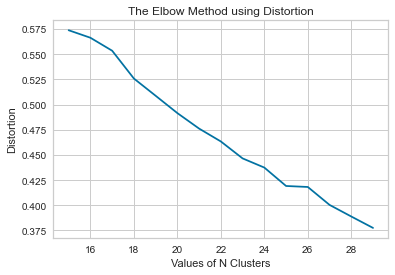

In [108]:
plt.plot(N, distortions, 'bx-') 
plt.xlabel('Values of N Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

/Users/yannyinc/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f95f2c4aa60>,
                     model=None)

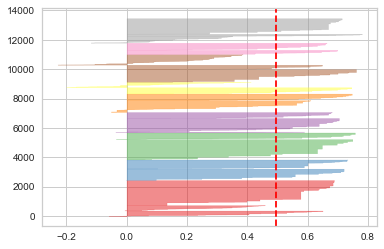

In [109]:
sv = SilhouetteVisualizer(KMeans(22))
sv.fit(dataset)


In [18]:
#viz_set = dataset
#fig, ax = plt.subplots(2, 2, figsize=(15,8))
#for i in [15, 18, 20, 25]:

#    Create KMeans instance for different number of clusters

#    km = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=300, random_state=42)

#    Create SilhouetteVisualizer instance with KMeans instance
#    Fit the visualizer
 
#    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
#    visualizer.fit(viz_set)

In [19]:
filename = '/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/kmean_model.sav'
joblib.dump(model, filename)

['/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/kmean_model.sav']

In [20]:
beer_raw_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/final_beerdata.csv")

In [21]:
beer_raw_csv["Kmeans Cluster"] = beer_cluster

In [22]:
beer_raw_csv.groupby

<bound method DataFrame.groupby of        brewery_id                brewery_name  beer_id  \
0               1    Plzensky Prazdroj, a. s.      429   
1               1    Plzensky Prazdroj, a. s.     5916   
2               1    Plzensky Prazdroj, a. s.    19123   
3               1    Plzensky Prazdroj, a. s.    41294   
4               1    Plzensky Prazdroj, a. s.    49865   
...           ...                         ...      ...   
13241       27861             Unity Vibration    77099   
13242       27870         4 Hands Brewing Co.    76562   
13243       27879            Birdsong Brewing    76616   
13244       27912           Harvester Brewing    76911   
13245       27919  Fiddlehead Brewing Company    76970   

                               beer_name beer_style  beer_abv beer_strength  \
0                        Pilsner Urquell   pilsener       4.4          Full   
1                              Gambrinus   pilsener       5.0          Full   
2                         Gambr